# Unsupervised Learning: Clustering analysis

In this notebook, we will explore some clustering techniques using python

This is a Jupyter Notebook. It allows you to run programming code in single steps. in order to run the code of a given cell, you need to position yoursefl on the cell by clicking on it, and then pressing the `Run` button at the top of the notebook, or by using the short-cut keys `Shift + Enter`.

### 1. Load Packages

In [3]:
# Pandas is open source data analysis and manipulation tool that will allow is to work with data frames
# Import pandas and call it pd in the rest of the notebook:
import pandas as pd
# Numpy is the numerical python library for mathematical operations. Specially suited to perform 
# array (vector/matrix) operations
# Import numpy and call it np:
import numpy as np
# Sci-kit learn is a simple and efficient set of tools for predictive data analysis
# Import the sci-kit learn's linear model:
from sklearn import linear_model
# Matplotlib is library for creating static, animated, and interactive visualizations in Python
# Import the module pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Read Data into a Pandas Data Frame 

In [4]:
# Using the method 'read_csv' from pandas (pd) we will read our data
# The method taxes as first argument the name of the file in our computer (Cluster.csv)
# the rest of the arguments are optionas so they shall be called by their name:
# "index_col" argument: the name of the column on that file that will be used as index ('T')
# "parse_dates" argument: A boolean (True or False) that tells pandas whehter to parse the dates
df = pd.read_csv('../../../Data/Cluster.csv',index_col='T',parse_dates=True)

### 3. Quick look at the data

In [5]:
# The method "head" will return the first five rows of our data frame
# it receives no arguments
df.head()

,S,Spread
T,,
2012-10-01,9.81,0.270914
2012-09-28,9.49,0.290254
2012-09-27,9.74,0.250696
2012-09-26,9.49,0.269219
2012-09-25,9.59,0.253442


### 4. Transform data into vector

In [7]:
#create data matrix
A = df.values
#transform into vector
creditspread = A[:,-1].reshape(-1,1)
shareprice = A[:,0].reshape(-1,1)

### 5. Create X and Y

In [8]:
# Create X and Y
X = np.log(shareprice[0,0]/shareprice)
Y= np.log(creditspread/creditspread[0,0])

### 6.  Ordinary Least Squares

In [9]:
# Initialize the Linear model. The fit_intercept paramenter tell the model not to fit the intercept
ols = linear_model.LinearRegression( fit_intercept=False)
# Fit the model to the data
ols.fit(X,Y)

LinearRegression(fit_intercept=False)

In [16]:
# Extract the R_Squared score
print("R^2 score: ", ols.score(X,Y))
print("Coeficient of the regression: ", ols.coef_[0][0])

R^2 score:  0.8041995869092445
Coeficient of the regression:  3.084466106237418


### 7. Create a Test Example

In [19]:
# Make a test (using the training sample)
shareprice_test = np.arange(5,12,0.1)
# Since we did not fit the intescept we just have to multiply the coefficient times our data
# and perform the scale transformations
creditspread_test = creditspread[0,0] * np.exp(ols.coef_[0,0]*np.log(shareprice[0,0]/shareprice_test))

### 8. Plot the result

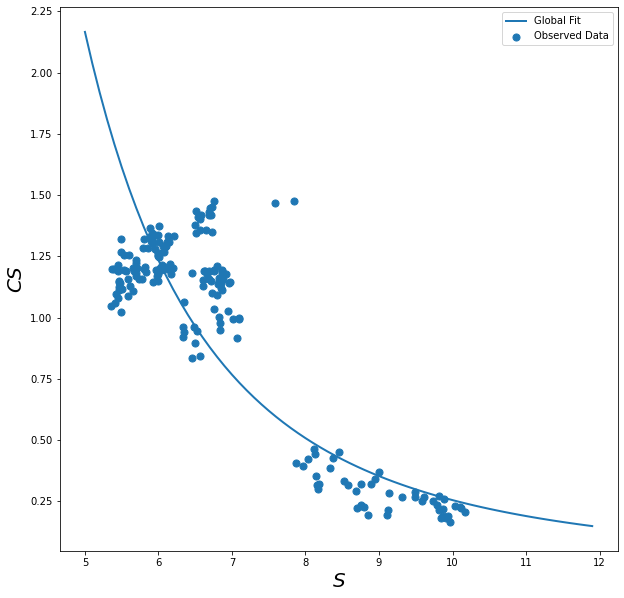

In [21]:
#plotthe results
fig = plt.figure(figsize=[10,10])
plt.scatter(shareprice,creditspread,label='Observed Data',s=50)
plt.plot(shareprice_test,creditspread_test, label='Global Fit',linewidth=2)
plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20)
plt.legend();

### We could have doen a regression for _each_ cluset

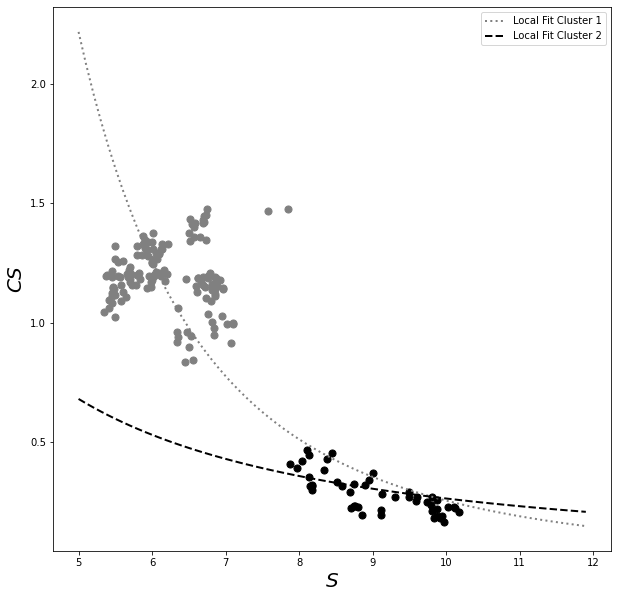

In [23]:
# plotting possible clustors
# choose a value of 7 for S and .81 for CS to divide the data into two clusters
idx = (A[:,0]>7) &  (A[:,1]<0.81)

# first fit, Use only the data for the first cluster
X_1 =X[~idx]
Y_1 = Y[~idx]
# Fit the linear model to the firt cluster
ols_1 = linear_model.LinearRegression( fit_intercept=False)
ols_1.fit(X_1,Y_1)
# save the R^2 score for the first cluster
R_1 = ols_1.score(X_1,Y_1)
# Create a test sample
creditspread_1= creditspread[0,0] * np.exp(ols_1.coef_[0,0]*np.log(shareprice[0,0]/shareprice_test))

# Second fit, Use only the data of the second cluster
X_2 =X[idx]
Y_2 = Y[idx]
# Fit the model
ols_2 = linear_model.LinearRegression( fit_intercept=False)
ols_2.fit(X_2,Y_2)
# Save the R^2 score and compute a test example
R_2=ols_2.score(X_2,Y_2)
creditspread_2= creditspread[0,0] * np.exp(ols_2.coef_[0,0]*np.log(shareprice[0,0]/shareprice_test))

# Plot the results
fig = plt.figure(figsize=[10,10])
# Plot data for cluster 1
plt.scatter(shareprice[~idx],creditspread[~idx],s=50,color='gray')
# Plot data for cluster 2
plt.scatter(shareprice[idx],creditspread[idx],s=50,color='black')
# Plot the Local Fit for both clusters
plt.plot(shareprice_test,creditspread_1, label='Local Fit Cluster 1',linewidth=2,linestyle='dotted',color='gray')
plt.plot(shareprice_test,creditspread_2, label='Local Fit Cluster 2',linewidth=2,linestyle='--',color='black')

plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20)
plt.legend();